In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
#from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import time

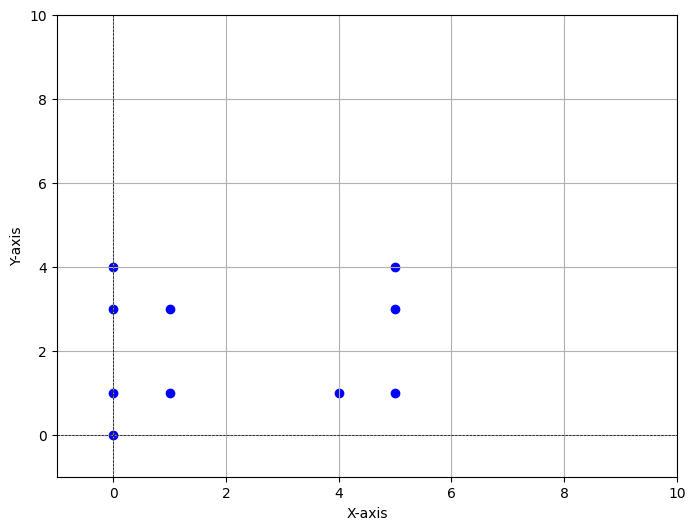

In [2]:
#Y = np.array([[0,0],[0,1],[10,0],[10,1],[5,5],[5,6]])
#Y = np.array([[0,9],[12,16],[12,2],[15,12],[5,5],[5,6]])
#Y = np.array([[0,0,0],[0,1,0],[0,0,1],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]])
Y = np.array([[0,0],[0,1],[1,1],[4,1],[5,1],[1,3],[0,3],[0,4],[5,3],[5,4]])


x_values = Y[:, 0]  
y_values = Y[:, 1]  

plt.figure(figsize=(8, 6))  
plt.scatter(x_values, y_values, color='blue', marker='o')

plt.xlabel('X-axis')  
plt.ylabel('Y-axis')
plt.grid(True) 
plt.xlim(-1, 10)  
plt.ylim(-1, 10)   

plt.axhline(0, color='black',linewidth=0.5, ls='--') 
plt.axvline(0, color='black',linewidth=0.5, ls='--')  
plt.show()

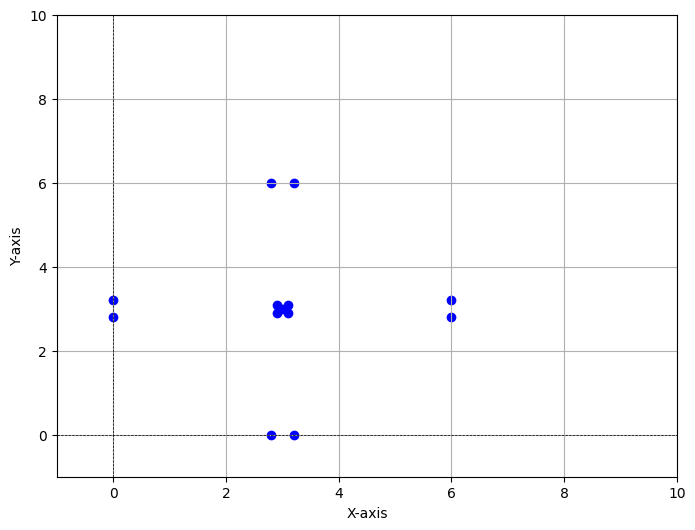

In [29]:
#Y = np.array([[3.2,0],[2.8,0],[0,3.2],[0,2.8],[6,3.2],[6,2.8],[3.2,6],[2.8,6],[3,3],[3.1,3.1],[3.1,2.9],[2.9,3.1],[2.9,2.9]])#,[2.5,-2.5],[-2.5,2.5],[-2.5,-2.5]])#,[5,4]])
Y= np.array([[0,0],[0,2],[2,0],[2,2]])

x_values = Y[:, 0]  
y_values = Y[:, 1]  

plt.figure(figsize=(8, 6))  
plt.scatter(x_values, y_values, color='blue', marker='o')

plt.xlabel('X-axis')  
plt.ylabel('Y-axis')
plt.grid(True) 
plt.xlim(-1, 10)  
plt.ylim(-1, 10)   

plt.axhline(0, color='black',linewidth=0.5, ls='--') 
plt.axvline(0, color='black',linewidth=0.5, ls='--')  
plt.show()

In [31]:
import itertools

def find_best_clustering(points, k):
    start=time.time()
    n = len(points) 
    best_score = -1 
    best_labels = None 
    best_clusts =list()
    
    for labels in itertools.product(range(k), repeat=n):
        if len(set(labels))<k:
            continue
        labels = np.array(labels)

        if len(set(labels)) > 1: 
            score = silhouette_score(points, labels)
            
            if score > best_score:
                best_score = score
                best_labels = labels
                best_clusts=[]

            if score == best_score:
                best_clusts.append(labels)

    end=time.time()
    print(len(best_clusts))
    print("Results for k =",k,"\nBest clusterings: ",best_clusts, " Best score: ",best_score," Runtime: ", end-start)
    return best_labels, best_score, best_clusts


In [5]:
def plot_clusters(points, labels):
    plt.scatter(points[:, 0], points[:, 1], c=labels, cmap=plt.cm.Set1, s=100, edgecolor='k')
    plt.title("Clustered Data")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

4
Results for k = 2 
Best clusterings:  [array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]), array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])]  Best score:  0.39986658659058805  Runtime:  5.1496498584747314


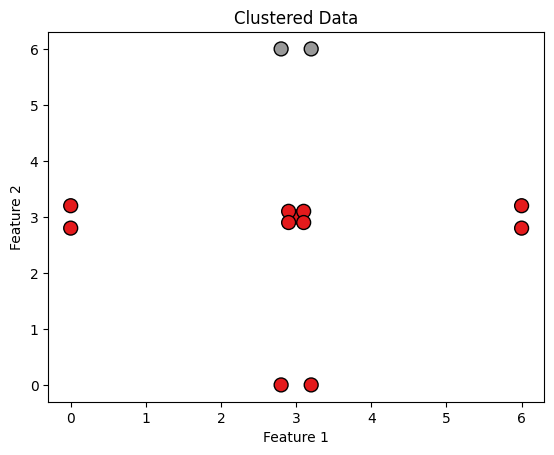

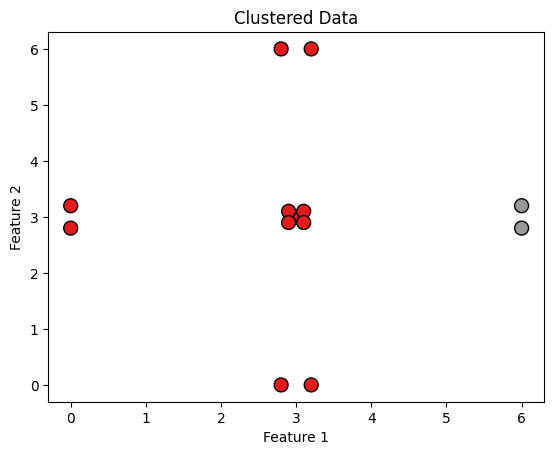

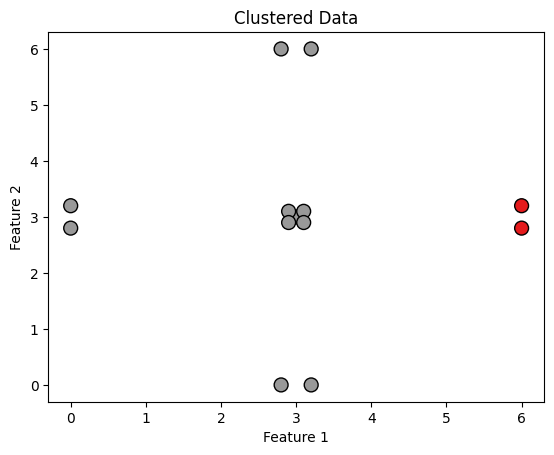

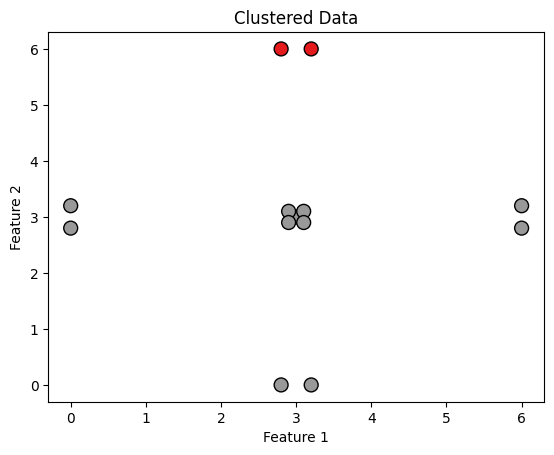

In [32]:
for k in [2]:
    lab,score,lista=find_best_clustering(Y,k)
    for i in lista:
        plot_clusters(Y,i)


Results for k = 2 
Best clustering:  [0 0 0 1 1 0 0 0 1 1]  Best score:  0.5614944612552737  Runtime:  0.6349208354949951


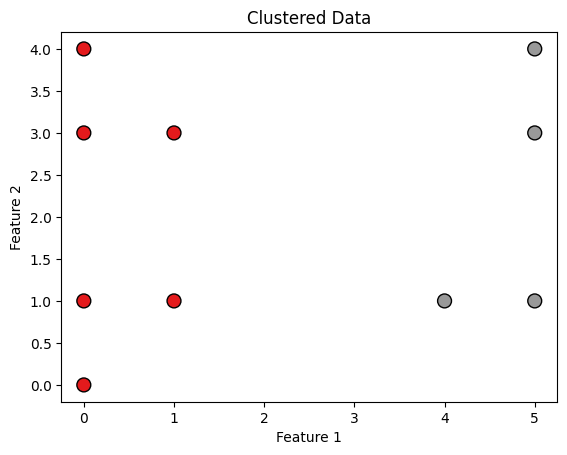

Results for k = 3 
Best clustering:  [0 0 0 1 1 2 2 2 1 1]  Best score:  0.5603396844863262  Runtime:  34.89198303222656


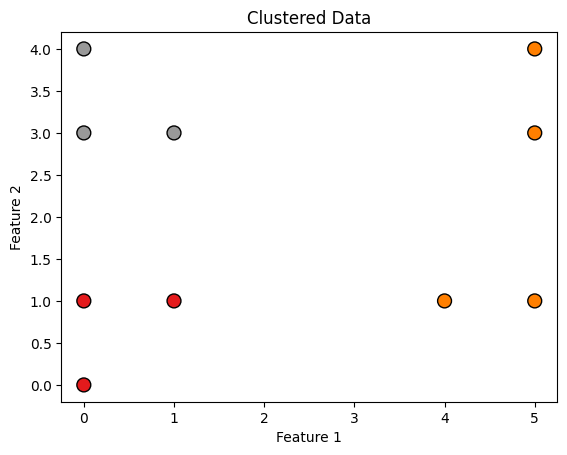

In [5]:

for k in [2,3]:
    lab,score=find_best_clustering(Y,k)
    plot_clusters(Y,lab)


Results for k= 4 
Best clustering:  [0 0 0 1 1 2 2 2 3 3]  Best score:  0.5911992596268625  Runtime:  477.0671169757843


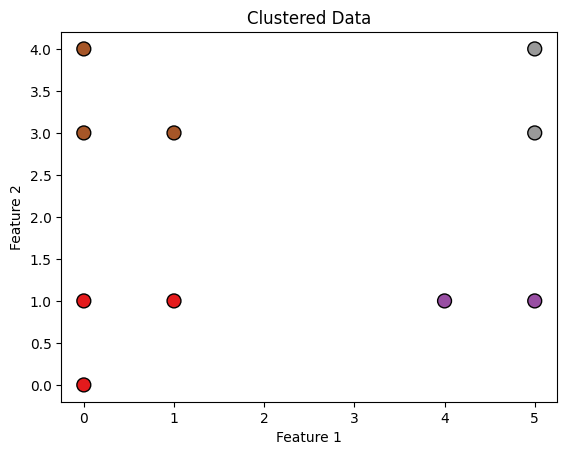

In [52]:
lab,score=find_best_clustering(Y,4)
plot_clusters(Y,lab)


Results for k = 5 
Best clustering:  [0 0 0 1 2 3 3 3 4 4]  Best score:  0.46458344113390665  Runtime:  2973.7672641277313


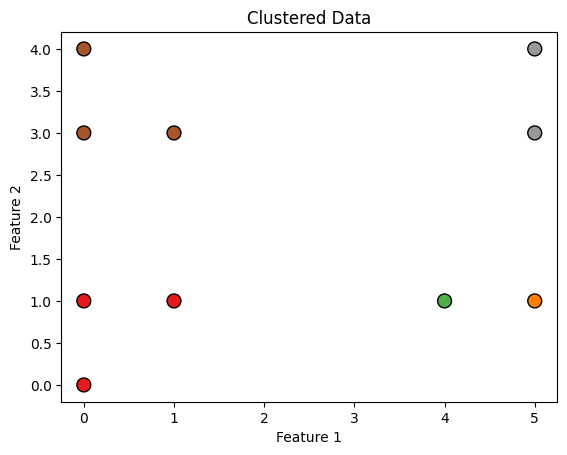

In [6]:
lab,score=find_best_clustering(Y,5)
plot_clusters(Y,lab)